# Exploring the Historical NFL Dataset 
This dataset was downloaded by the `download_dataset.py` script in the `src/` directory of this project.  As mentioned there, the data was downloaded from [FiveThirtyEight](www.fivethirtyeight.com).

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

%matplotlib inline

In [2]:
data_dir = os.path.abspath('../data')
print(f'Opening datasets from {data_dir}')

Opening datasets from C:\Users\dmris\Documents\Python Scripts\elo_ratings\nfl-ratings\data


In [3]:
from glob import glob
print(glob(f'{data_dir}/*.csv'))

['C:\\Users\\dmris\\Documents\\Python Scripts\\elo_ratings\\nfl-ratings\\data\\historical_data.csv', 'C:\\Users\\dmris\\Documents\\Python Scripts\\elo_ratings\\nfl-ratings\\data\\latest_data.csv']


In [4]:
data = pd.read_csv(f'{data_dir}/historical_data.csv')
data.head(12)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
2,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
3,1920-10-03,1920,0,NaN,CHI,MUT,1368.333,1300.000,0.682986,0.317014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.0
4,1920-10-03,1920,0,NaN,CBD,PTQ,1504.688,1300.000,0.825267,0.174733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
5,1920-10-03,1920,0,NaN,BFF,WBU,1478.004,1300.000,0.802000,0.198000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,6.0
6,1920-10-03,1920,0,NaN,AKR,WHE,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
7,1920-10-03,1920,0,NaN,RCH,ABU,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0
8,1920-10-10,1920,0,NaN,CHT,ARI,1300.000,1493.002,0.323696,0.676304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9,1920-10-10,1920,0,NaN,DAY,CTI,1515.434,1464.506,0.660906,0.339094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [5]:
data.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2'],
      dtype='object')

### Dataset Variables 
This dataset contains several variables, and games going back to the year 1920.  FiveThirtyEight has provided their ELO ratings for each team at the start/end of each game.  Many of the teams in this dataset no longer exist.  Here's a rundown of the variable defintions. 

- date - the date of the game
- season - the year that the season started
- neutral - if the game was played at a neutral field
- playoff - a categorical variable that describes the normal season, playoff rounds, and superbowl
- team1 - the home team
- team2 - the away team
- score1 - the home team score
- score2 - the away team score

There are also several elo variables provided.  Let's make the date column into a datetime type, and find out why some team entries are nan.

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data[np.logical_or(data['team1'].isna(), data['team2'].isna())]

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
16530,2020-01-03,2019,0,w,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16531,2020-01-03,2019,0,w,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16532,2020-01-04,2019,0,w,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16533,2020-01-04,2019,0,w,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16534,2020-01-10,2019,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16535,2020-01-10,2019,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16536,2020-01-11,2019,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16537,2020-01-11,2019,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16538,2020-01-18,2019,0,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16539,2020-01-18,2019,0,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These seem to be games for the playoffs in the current season, which haven't been decided yet.  Let's get rid of these from our dataset. 

In [8]:
data = data[np.logical_not(np.logical_or(data['team1'].isna(), data['team2'].isna()))]

In [9]:
print(f'{len(data)} entries remain in the historical dataset after dropping the post-season games.')

16530 entries remain in the historical dataset after dropping the post-season games.


We should now have no team name entries remaining with nan values.

In [10]:
data['team1'].isna().sum(), data['team2'].isna().sum()

(0, 0)

# Basic Plots and Exploration
Let's take a look at some basics.  I'll start by asking how many teams existed in each season, and how many games each played.

In [11]:
def find_teams(teams1, teams2):
    ''' Given two lists of teams, determine the union. '''
    teamset1, teamset2 = set(teams1), set(teams2)
    return teamset1.union(teamset2)

def find_teams_dataframe(dataframe):
    ''' Same as above, but does the splitting after being given the dataframe object. '''
    return find_teams(dataframe['team1'], dataframe['team2'])

In [12]:
all_teams = find_teams(data['team1'], data['team2'])
print(f'Over the entire historical dataset {len(all_teams)} unique teams exist.')

Over the entire historical dataset 123 unique teams exist.


In [13]:
teams_per_season = data.groupby('season')['team1', 'team2'].aggregate({
    'team1' : set,
    'team2' : set
}).apply(find_teams_dataframe, axis=1)

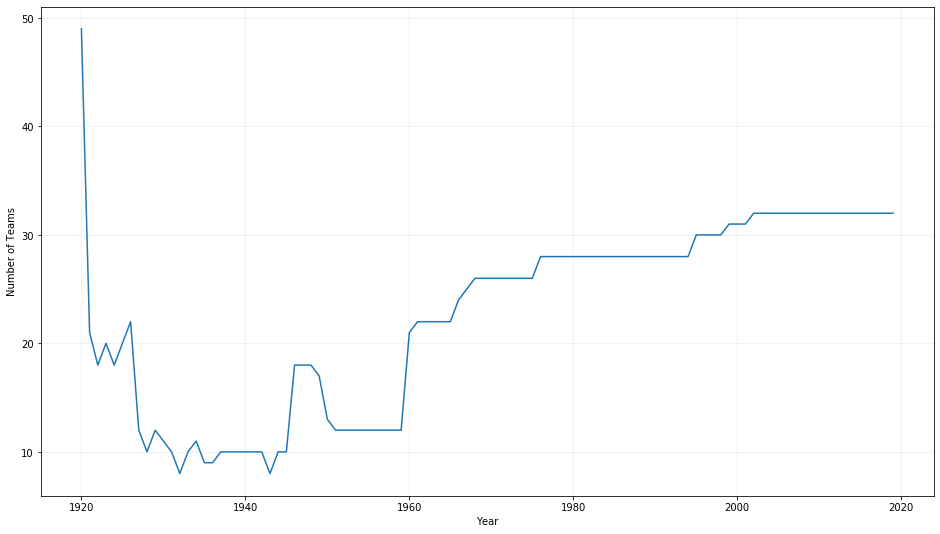

In [14]:
nteams_per_season = teams_per_season.apply(len)
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)
ax.plot(nteams_per_season.index, nteams_per_season.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Teams')
ax.grid(alpha=0.2)

So many teams existed in 1920, this seems strange to me.

In [15]:
nteams_per_season[nteams_per_season.index == 1920]

season
1920    49
dtype: int64

In [16]:
def find_team_active_range(team, data):
    team_data = data[np.logical_or(data['team1'] == team, data['team2'] == team)]
    return (team_data['season'].min(), team_data['season'].max())

In [17]:
team_data_for_df = {}
team_data_for_df['team'] = []
team_data_for_df['first_year'] = []
team_data_for_df['last_year'] = []

for team in all_teams:
    team_data_for_df['team'].append(team)
    active_years = find_team_active_range(team, data)
    team_data_for_df['first_year'].append(active_years[0])
    team_data_for_df['last_year'].append(active_years[1])

In [18]:
team_data_agg = pd.DataFrame(team_data_for_df)
team_data_agg.head(12)

,team,first_year,last_year
0,HAM,1920,1926
1,DAL,1960,2019
2,ABU,1920,1920
3,WGC,1920,1920
4,CST,1920,1920
5,MCK,1920,1920
6,KEN,1924,1924
7,NO,1967,2019
8,CAR,1995,2019
9,RII,1920,1925


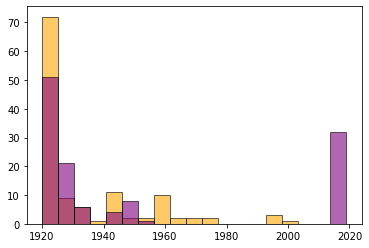

In [19]:
plt.hist(team_data_agg['first_year'], edgecolor='k', color='orange', bins=np.linspace(1920,2019,20), alpha=0.6);
plt.hist(team_data_agg['last_year'], edgecolor='k', color='purple', bins=np.linspace(1920,2019,20), alpha=0.6);

Let's look at only active teams and see when they first played.

Text(0.5, 0, 'Year Joined NFL')

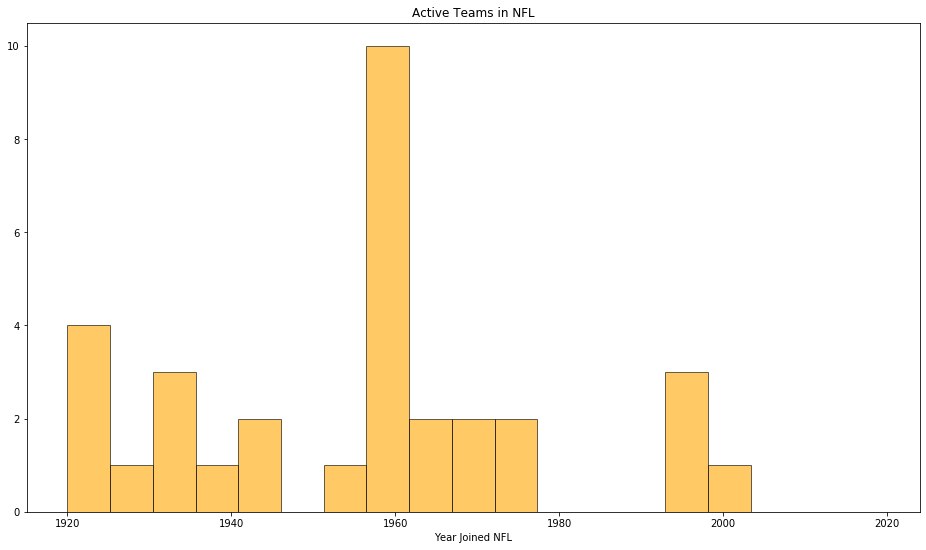

In [20]:
plt.figure(figsize=(16,9))
plt.hist(team_data_agg[team_data_agg['last_year'] == 2019]['first_year'],
         edgecolor='k', color='orange', bins=np.linspace(1920,2019,20), alpha=0.6);
plt.title('Active Teams in NFL')
plt.xlabel('Year Joined NFL')

Let's turn our attention to the ELO ratings. 

In [21]:
def find_team_elo(team, data):
    team_data = data[np.logical_or(data['team1'] == team, data['team2'] == team)]
    team_data['pregame_elo'] = np.zeros(len(team_data))
    team_data['pregame_elo'][team_data['team1'] == team] = team_data['elo1_pre'][team_data['team1'] == team]
    team_data['pregame_elo'][team_data['team2'] == team] = team_data['elo2_pre'][team_data['team2'] == team]
    return team_data['date'], team_data['pregame_elo']

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dmris\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

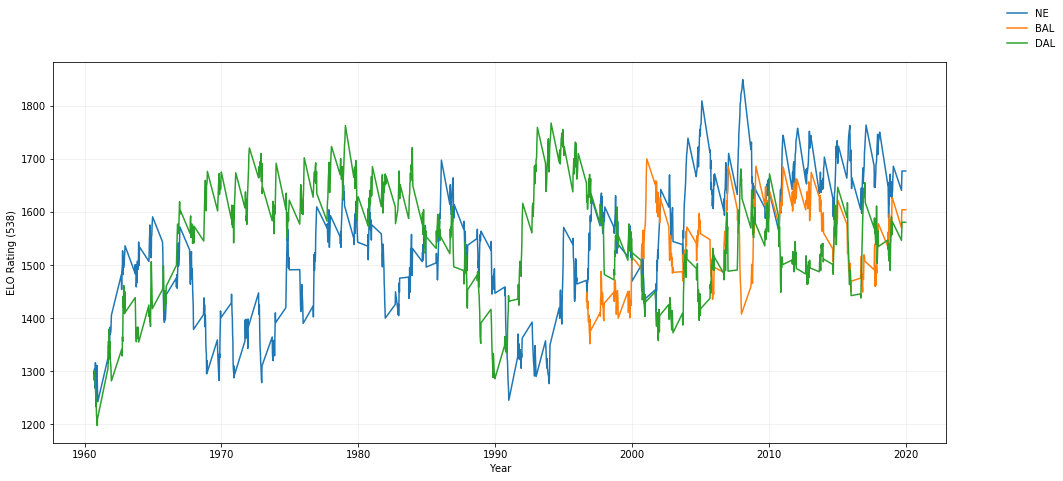

In [22]:
plot_teams = ['NE', 'BAL', 'DAL']

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)
for team in plot_teams:
    date, elo = find_team_elo(team,data)
    ax.plot(date, elo, label=team)
    
ax.set_xlabel('Year')
ax.set_ylabel('ELO Rating (538)')
ax.grid(alpha=0.2)
fig.legend(frameon=False)

Let's try to zoom in to investigate this jumpy behaviour.

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

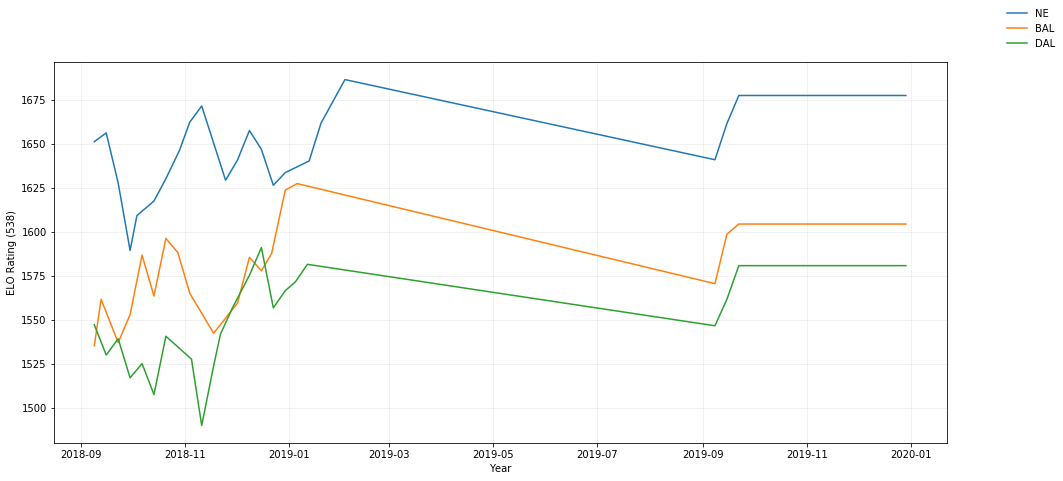

In [23]:
plot_teams = ['NE', 'BAL', 'DAL']

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)
for team in plot_teams:
    date, elo = find_team_elo(team,data[data['season'] > 2017])
    ax.plot(date, elo, label=team)
    
ax.set_xlabel('Year')
ax.set_ylabel('ELO Rating (538)')
ax.grid(alpha=0.2)
fig.legend(frameon=False)

It looks like the jumpy behaviour on the left (prior to the end of the 2018 season) is simply the ELO rating system updating itself.  In the middle, the ELO rating for all three teams is adjusted down, and when they begin playing (after Sept. 2019) the ratings begin to climb again.

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

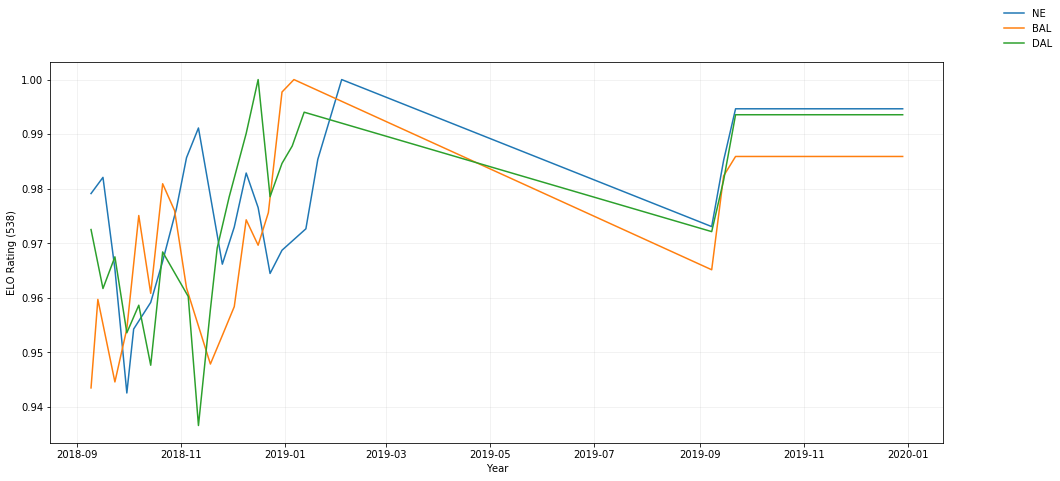

In [24]:
plot_teams = ['NE', 'BAL', 'DAL']

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)
for team in plot_teams:
    date, elo = find_team_elo(team,data[data['season'] > 2017])
    ax.plot(date, elo / elo.max(), label=team)
    
ax.set_xlabel('Year')
ax.set_ylabel('ELO Rating (538)')
ax.grid(alpha=0.2)
fig.legend(frameon=False)

# Validation 
How do the predictions actually perform, let's look at the 2018 season.  Although probability was predicted, let's take a simpler view of the situation to start with and simply look at the accuracy.  In order to do so we will round the probability.

In [25]:
validation_data = data[data['season'] == 2018]

In [26]:
def determine_winner(row):
    ''' If there was a draw, winner is zero.  Otherwise return the winner of the game 
    as an integer. '''
    winner = 0 
    if row['score1'] > row['score2']:
        winner = 1
    elif row['score2'] > row['score1']:
        winner = 2 
    return winner 

In [27]:
validation_data['winner'] = validation_data.apply(determine_winner, axis=1)

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
np.unique(validation_data['winner'], return_counts=True)

(array([0, 1, 2], dtype=int64), array([  2, 158, 107], dtype=int64))

There were two games which ended in a draw in the 2018 season.  The home team won 158 times, and the away team won 107 times.

In [29]:
validation_data['pred_winner'] = validation_data['elo_prob1'].apply(lambda x: 1 if x >= 0.5 else 2)

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
validation_data[['winner', 'pred_winner']].head()

,winner,pred_winner
16007,1,1
16008,2,2
16009,2,2
16010,1,1
16011,1,1


In [31]:
validation_data['correct'] = (validation_data['winner'] == validation_data['pred_winner'])

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
ncorrect = validation_data['correct'].sum()
print(f'In the 2018 season, FiveThirtyEight correctly predicted {ncorrect} of {len(validation_data)} games.')

In the 2018 season, FiveThirtyEight correctly predicted 166 of 267 games.


In [33]:
ncorrect / len(validation_data)

0.6217228464419475

In [34]:
seasonal_performance = validation_data.groupby('date').aggregate({
    'correct' : [np.mean, len]
}).reset_index()
seasonal_performance.columns = ['date', 'correct_fraction', 'ngames']

Text(0, 0.5, 'Fraction of games predicted correctly')

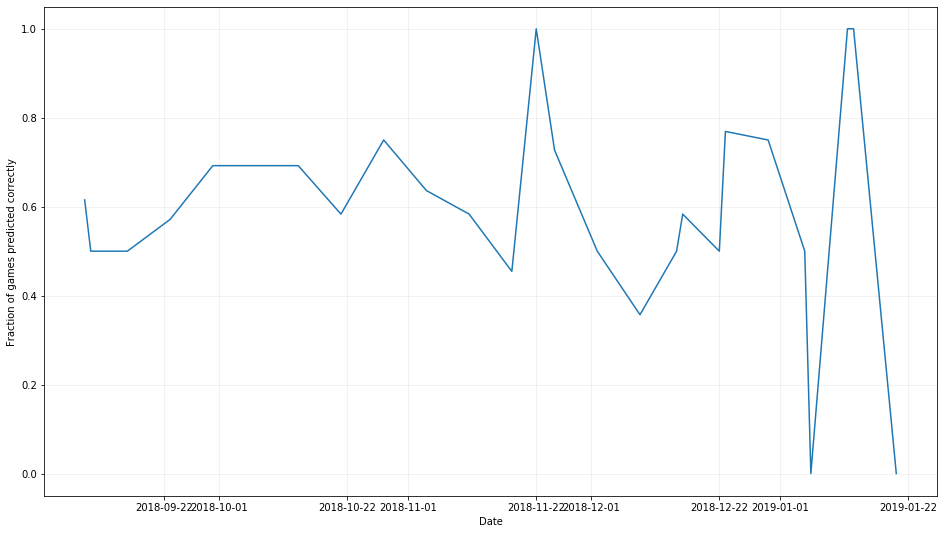

In [35]:
plt.figure(figsize=(16,9))
plt.plot(seasonal_performance[seasonal_performance['ngames']>1]['date'],
        seasonal_performance[seasonal_performance['ngames']>1]['correct_fraction'])
plt.grid(alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Fraction of games predicted correctly')

In [36]:
home_team_valid = validation_data.groupby('team1').aggregate({
    'correct' : len,
    'elo1_pre' : [np.min, np.max, np.mean, np.std]
}).reset_index()
home_team_valid.columns = ['team', 'ncorrect', 'elo_min', 'elo_max', 'elo_mean', 'elo_std']

In [37]:
away_team_valid = validation_data.groupby('team2').aggregate({
    'correct' : len,
    'elo2_pre' : [np.min, np.max, np.mean, np.std]
}).reset_index()
away_team_valid.columns = ['team', 'ncorrect', 'elo_min', 'elo_max', 'elo_mean', 'elo_std']

In [38]:
home_team_valid.corr()['ncorrect']

ncorrect    1.000000
elo_min     0.538452
elo_max     0.648372
elo_mean    0.609660
elo_std     0.125261
Name: ncorrect, dtype: float64

In [39]:
away_team_valid.corr()['ncorrect']

ncorrect    1.000000
elo_min     0.415534
elo_max     0.495672
elo_mean    0.431627
elo_std     0.045236
Name: ncorrect, dtype: float64

In [40]:
validation_data['proba1_bin'] = np.digitize(validation_data['elo_prob1'], np.linspace(0, 1, 21))
validation_data['proba2_bin'] = np.digitize(validation_data['elo_prob2'], np.linspace(0, 1, 21))

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
binned_home_prediction = validation_data.groupby('proba1_bin').aggregate({
    'winner' : [len, lambda x: np.mean(x == 1)]
}).reset_index()
binned_home_prediction.columns = ['bin', 'ngames', 'fraction_won']

binned_away_prediction = validation_data.groupby('proba2_bin').aggregate({
    'winner' : [len, lambda x: np.mean(x == 2)]
}).reset_index()
binned_away_prediction.columns = ['bin', 'ngames', 'fraction_won']

In [42]:
binned_home_prediction

,bin,ngames,fraction_won
0,4,2,0.000000
1,5,7,0.428571
2,6,6,0.333333
3,7,11,0.181818
4,8,16,0.562500
5,9,13,0.538462
6,10,17,0.470588
7,11,28,0.571429
8,12,27,0.592593
9,13,40,0.550000


In [43]:
binned_home_prediction['bin_avg_prob'] = binned_home_prediction['bin'] / 20.0 + 0.025
binned_away_prediction['bin_avg_prob'] = binned_away_prediction['bin'] / 20.0 + 0.025

In [45]:
if not os.path.exists('../figures'):
    os.mkdir('../figures')

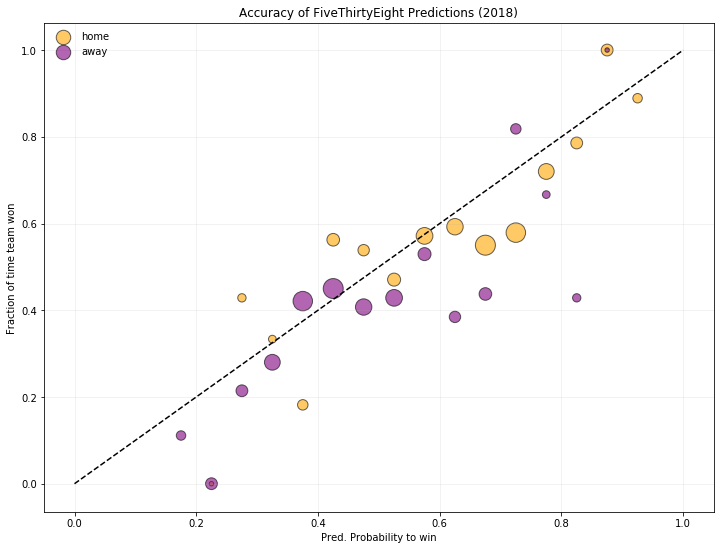

In [46]:
plt.figure(figsize=(12,9))
plt.scatter(binned_home_prediction['bin_avg_prob'], binned_home_prediction['fraction_won'], 
           marker='o', edgecolor='k', alpha=0.6, label='home', s=10 * binned_home_prediction['ngames'],
           color='orange')
plt.scatter(binned_away_prediction['bin_avg_prob'], binned_away_prediction['fraction_won'], 
           marker='o', edgecolor='k', alpha=0.6, label='away', s=10 * binned_away_prediction['ngames'],
           color='purple')
plt.grid(alpha=0.2)
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), linestyle='--', color='black')
plt.xlabel('Pred. Probability to win')
plt.ylabel('Fraction of time team won')
plt.title('Accuracy of FiveThirtyEight Predictions (2018)')
plt.legend(frameon=False)
plt.savefig('../figures/validation2018.pdf', bbox_inches='tight')

In [199]:
def entropy_metric(pred, truth, epsilon=1e-9):
    ''' Calculate the cross-entropy for these predictions.  In this function, I assume that
    the prediction is a probability, and the truth information is the outcome of the game.  
    The outcome variable can be:
        0 - The team lost 
        1 - The team won 
        0.5 - The game was a draw 
    
    The formula applied for each prediction is: 
        cross_entropy (win) = ln(1 - prob)
        cross_entropy (lose) = ln(prob)
        
    '''
    pred = np.clip(pred, epsilon, 1 - epsilon)
    
    win_index = np.where(truth == 1)[0]
    loss_index = np.where(truth == 0)[0]
    draw_index = np.where(truth == 0.5)[0]
    
    loss = np.zeros(len(truth))
    loss[win_index] = -1 * np.log(pred[win_index])
    loss[loss_index] = -1 * np.log(1-pred[loss_index])
    #loss[draw_index] = -1 * np.log(np.abs(0.5-pred[draw_index]) + epsilon)
    return np.mean(loss)

In [200]:
def get_game_outcome(game):
    ''' By default, return 0.5 for a draw.  Otherwise, return 1 if team1 won, otherwise return 0.'''
    if game['score1'] > game['score2']:
        return 1.0
    elif game['score1'] == game['score2']:
        return 0.5
    else:
        return 0.0

In [201]:
validation_data['outcome'] = validation_data.apply(get_game_outcome, axis=1)

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [202]:
validation_data['outcome'].value_counts()

1.0    158
0.0    107
0.5      2
Name: outcome, dtype: int64

In [203]:
entropy_metric(validation_data['elo_prob1'].values, validation_data['outcome'].values)

0.6288015051224425

In [204]:
def get_entropy_metric_for_df(df):
    df['outcome'] = df.apply(get_game_outcome, axis=1)
    return entropy_metric(df['elo_prob1'].values, df['outcome'].values)

In [215]:
year, entropy = [], []
for season in data['season'].unique():
    df = data[data['season'] == season]
    year.append(season)
    entropy.append(get_entropy_metric_for_df(df))

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


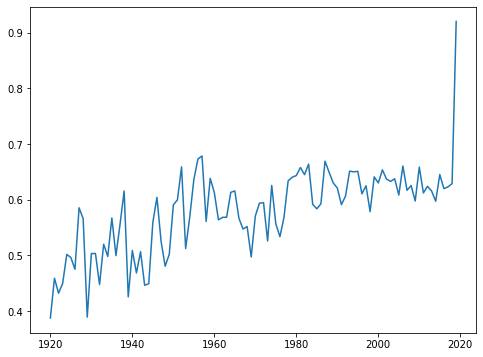

In [217]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(year, entropy)

In [209]:
entropy_metric(np.zeros(len(validation_data)), validation_data['outcome'].values)

12.263206001290385

In [210]:
entropy_metric(validation_data['elo_prob1'].values, validation_data['outcome'].values)

0.6288015051224425

In [214]:
test_preds = np.array([0.1, 0.6, 0.99])
test_truths = np.array([0, 1, 1])
entropy_metric(test_preds, test_truths)

0.20874549175910617